# Import Statements

In [ ]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from scipy.spatial.distance import mahalanobis
from google.colab import drive
import spacy
from sklearn.metrics.pairwise import cosine_similarity

# Installations

In [ ]:
!pip install spacy
!pip install spacy
!python -m spacy download el_core_news_sm
!pip install -U grecy
!python -m grecy install grc_perseus_sm

2024-01-14 12:14:44.636650: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-14 12:14:44.636706: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-14 12:14:44.637641: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-14 12:14:45.628798: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 64.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')

Installing grc_perseus_sm.....

Please wait, this could t

# Mounting Drive and Books

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def process_csv_files(folder_path):
    data = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)

            csv_data = []

            with open(file_path, 'r', encoding='utf-8') as csv_file:
                csv_reader = csv.reader(csv_file)
                for row in csv_reader:
                    for cell in row:
                        words = cell.split()
                        csv_data.extend(words)

            data.append(csv_data)

    return data

In [ ]:
Illiad_folder_path = '/content/drive/MyDrive/iliad_csvs'
Modern_folder_path = '/content/drive/MyDrive/book2_csvs'

In [ ]:
Illiad_linguistic_data = process_csv_files(Illiad_folder_path)

In [ ]:
Modern_linguistic_data = process_csv_files(Modern_folder_path)

# Formality Checker

In [ ]:
nlp = spacy.load("grc_perseus_sm")

In [ ]:
def detect_formality(sentences):
    results = []

    for sentence in sentences:
        text = ' '.join(sentence)

        doc = nlp(text)

        formal_count = 0
        informal_count = 0

        #Change these to specifically reflect features of the greek language. Modify to use SPACY maybe.
        formal_features = {"VERB", "ADV", "ADJ", "NOUN","AUX", "ADP", "CCONJ"}
        informal_features = {"INTJ","X", "PRON", "PROPN"}

        for token in doc:
            if token.pos_ in formal_features:
                formal_count += 1
            elif token.pos_ in informal_features:
                informal_count += 1

        if 0.3 * (formal_count + informal_count) < informal_count:
            result = "Informal"
        else:
            result = "Formal"

        results.append(result)

    return results

In [ ]:
Illiad_sentences = Illiad_linguistic_data
Illiad_results = detect_formality(Illiad_sentences)
print(Illiad_results)
print(Illiad_results.count('Formal'))

['Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal

In [ ]:
Modern_sentences = Modern_linguistic_data
Modern_results = detect_formality(Modern_sentences)
print(Modern_results)
print(Modern_results.count('Formal'))

['Informal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Informal', 'Formal', 'Formal', 'Informal', 'Informal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Informal', 'Informal', 'Informal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal', '

In [ ]:
def filter_sentences_by_formality(sentences, formality_results, target_formality):
    filtered_sentences = []

    for i, result in enumerate(formality_results):
        if result == target_formality:
            filtered_sentences.append(sentences[i])

    return filtered_sentences

In [ ]:
Illiad_informal = filter_sentences_by_formality(Illiad_linguistic_data, Illiad_results, 'Informal')
Illiad_formal = filter_sentences_by_formality(Illiad_linguistic_data, Illiad_results, 'Formal')
print(len(Illiad_informal))
print(len(Illiad_informal) + len(Illiad_formal))
Illiad_informal

131
3432


[['Ἰδομενεὺς',
  "δ'",
  'ἄρα',
  'Φαῖστον',
  'ἐνήρατο',
  'Μῄονος',
  'υἱὸν',
  'Βώρου,',
  'ὃς',
  'ἐκ',
  'Τάρνης',
  'ἐριβώλακος',
  'εἰληλούθει'],
 ['Κρητῶν',
  "δ'",
  'Ἰδομενεὺς',
  'δουρὶ',
  'κλυτὸς',
  'ἡγεμόνευεν,',
  'οἳ',
  'Κνωσόν',
  "τ'",
  'εἶχον',
  'Γόρτυνά',
  'τε',
  'τειχιόεσσαν,',
  'Λύκτον',
  'Μίλητόν',
  'τε',
  'καὶ',
  'ἀργινόεντα',
  'Λύκαστον',
  'Φαιστόν',
  'τε',
  'Ῥύτιόν',
  'τε,',
  'πόλεις',
  'εὖ',
  'ναιετοώσας,',
  'ἄλλοι',
  "θ'",
  'οἳ',
  'Κρήτην',
  'ἑκατόμπολιν',
  'ἀμφενέμοντο'],
 ['ἔνθα',
  'τίνα',
  'πρῶτον',
  'τίνα',
  "δ'",
  'ὕστατον',
  'ἐξενάριξαν',
  'Ἕκτωρ',
  'τε',
  'Πριάμοιο',
  'πάϊς',
  'καὶ',
  'χάλκεος',
  'Ἄρης;',
  'ἀντίθεον',
  "Τεύθραντ',",
  'ἐπὶ',
  'δὲ',
  'πλήξιππον',
  'Ὀρέστην,',
  'Τρῆχόν',
  "τ'",
  'αἰχμητὴν',
  'Αἰτώλιον',
  'Οἰνόμαόν',
  'τε,',
  'Οἰνοπίδην',
  "θ'",
  'Ἕλενον',
  'καὶ',
  'Ὀρέσβιον',
  'αἰολομίτρην,',
  'ὅς',
  "ῥ'",
  'ἐν',
  'Ὕλῃ',
  'ναίεσκε',
  'μέγα',
  'πλούτοιο',
  'μεμηλώς,',
  'λίμν

In [ ]:
Modern_informal = filter_sentences_by_formality(Modern_linguistic_data, Modern_results, 'Informal')
Modern_formal = filter_sentences_by_formality(Modern_linguistic_data, Modern_results, 'Formal')
print(len(Modern_informal))
print(len(Modern_informal) + len(Modern_formal))
Modern_informal

177
1366


[['Είχε',
  'νυχτώσει',
  'πιά',
  ':',
  'τἄστρα',
  'ἔλαμπαν',
  'κρῦα',
  'στὸν',
  'οὐρανό·',
  'Ἔτρεξε',
  'σπίτι'],
 ['μάτια',
  'του',
  'τὰ',
  'γαλαζοπράσινα',
  'μὲ',
  'τὰ',
  'μακριὰ',
  'ματόκλαδα',
  'Η',
  'Κερένια',
  'καρφωμένα',
  'πάνω',
  'της—',
  'τὴν',
  'κύτταζε',
  'ἀκόμα',
  'κι',
  'ὅταν',
  'δὲν',
  'τῆς',
  'μίλαγε'],
 ['Θέλεις,',
  'Λιόλια,',
  'νὰ',
  'χορέψῃς',
  'λιγάκι',
  ';',
  'τὴν',
  'ἀρώ',
  'τησε',
  'ὁ',
  'Νῖκος'],
 ['Αὐτὰ', 'εἶναι', 'πιὰ', 'τυχυρά'],
 ['Τί',
  'νύχτες',
  'ἦταν',
  'ἐκεῖνες',
  '!',
  'Δὲν',
  'ἦτον',
  'ὁ',
  'Νῖκος',
  'ποὺ',
  'Κούκλα',
  'Side',
  'κοιμότανε',
  'στὸ',
  'πλευρό',
  'της',
  ';',
  '-',
  'τόσο',
  'βαθιά',
  ',',
  'τόσο',
  'βα',
  'διά',
  '!',
  '-Γιατί',
  'δὲν',
  'τὴν',
  'ἔσφιγγαν',
  'τὰ',
  'δυνατά',
  'του',
  'χέρια',
  'σὰν',
  'πρῶτα',
  ';',
  'γιατί',
  'δὲ',
  'γύρευαν',
  'τὰ',
  'χείλια',
  'τὰ',
  'δικά',
  'της',
  ';',
  'τὸ',
  'ζεστὸ',
  'κορμί',
  'του',
  'τὸ',
  'δικό',
  'της',

# Mathematical Representation and Distance Querying

In [ ]:
def affinity_propagation(X, max_iter=200, damping=0.8, convergence_iter=15, random_state=None):
    affinity_prop = AffinityPropagation(max_iter=max_iter, damping=damping, convergence_iter=convergence_iter, random_state=random_state)
    cluster_centers_indices = affinity_prop.fit_predict(X)
    cluster_centers = np.array([X[cluster_centers_indices == i].mean(axis=0) for i in np.unique(cluster_centers_indices)])
    return cluster_centers_indices, cluster_centers

def mahalanobis_distance(query_point, clusters, covariances, regularization=1e-6):
    distances = []
    for center, covariance in zip(clusters, covariances):
        inv_covariance = np.linalg.pinv(covariance + regularization * np.eye(covariance.shape[0]))
        distance = mahalanobis(query_point, center, inv_covariance)
        distances.append(distance)
    return distances

def compute_covariance_matrix(cluster_data):
    if cluster_data.shape[0] > 1:
        return np.cov(cluster_data, rowvar=False)
    else:
        num_features = cluster_data.shape[1]
        return np.eye(num_features)

def plot_clusters(X, cluster_centers_indices, cluster_centers, query_point, min_cluster_index, figsize=(24, 24)):
    num_clusters = len(np.unique(cluster_centers_indices))
    cmap = plt.get_cmap('tab20', num_clusters)

    plt.figure(figsize=figsize)

    plt.scatter(X[:, 0], X[:, 1], c=cluster_centers_indices, cmap=cmap)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', color='black', label='Cluster Centers')
    plt.scatter(query_point[0], query_point[1], marker='D', color='red', s=100, label='Query Point')
    if min_cluster_index != -1:
        min_cluster_center = cluster_centers[min_cluster_index]
        plt.scatter(min_cluster_center[0], min_cluster_center[1], marker='o', color='green', s=100, label='Closest Cluster')
    plt.legend()
    plt.title("Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


def embed_linguistic_data(linguistic_data):
    model = Word2Vec(sentences=linguistic_data, vector_size=100, window=5, min_count=1, sg=0)
    embeddings = [model.wv[word] for sentence in linguistic_data for word in sentence]
    return np.array(embeddings)


def find_closest_cluster(query_point, clusters, covariances, regularization=1e-6):
    distances = []
    for center, covariance in zip(clusters, covariances):
        inv_covariance = np.linalg.pinv(covariance + regularization * np.eye(covariance.shape[0]))
        distance = mahalanobis(query_point, center, inv_covariance)
        distances.append(distance)
    min_distance_index = np.argmin(distances)
    return min_distance_index

def calculate_jaccard_similarity(clustering1, clustering2):
    set1 = set(clustering1)
    set2 = set(clustering2)
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    jaccard_similarity = intersection / union
    return jaccard_similarity

# Clustering of Slang Phrases

Mean of z-score normalized data: [ 1.4616425e-08 -7.7448075e-09]
Standard deviation of z-score normalized data: [1.000001   0.99999946]


<ipython-input-58-1f8391182a9e>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')


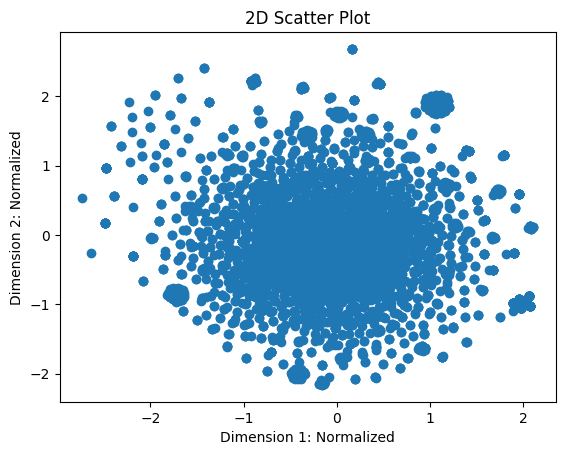

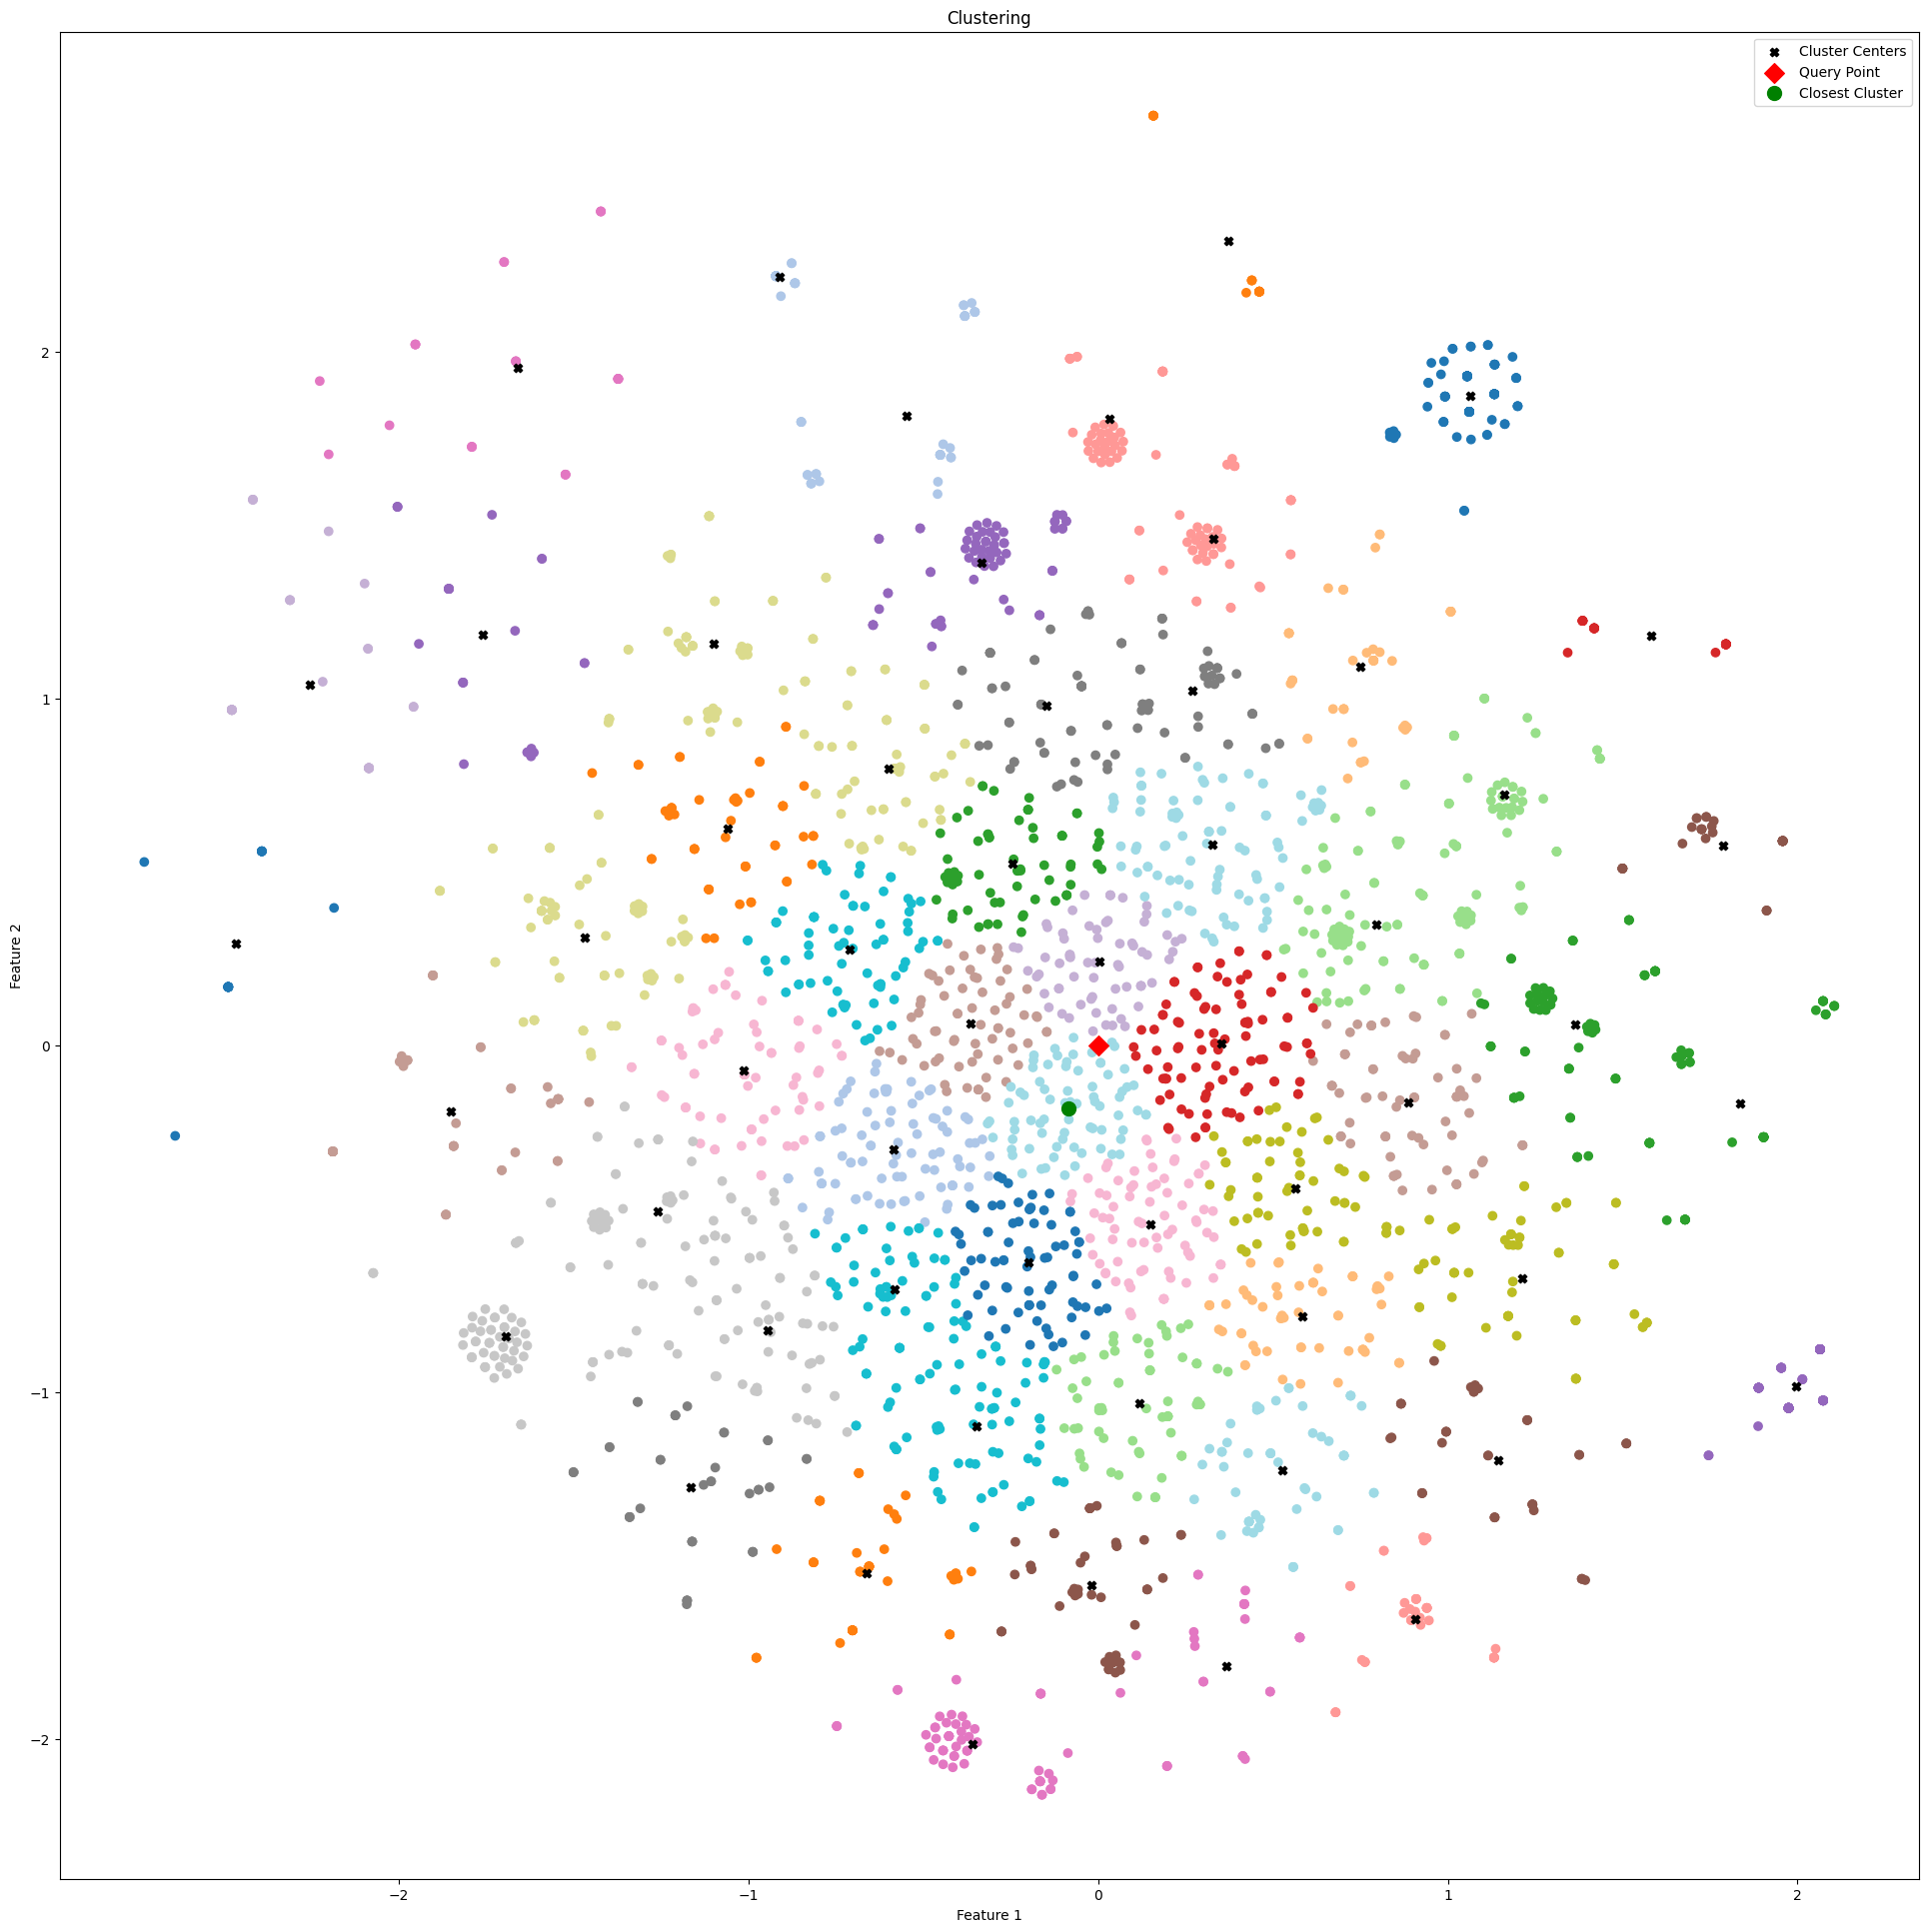

Cluster 1 - Mahalanobis Distance: 24.6162
Cluster 2 - Mahalanobis Distance: 23.6673
Cluster 3 - Mahalanobis Distance: 5.5915
Cluster 4 - Mahalanobis Distance: 4.5945
Cluster 5 - Mahalanobis Distance: 13.0564
Cluster 6 - Mahalanobis Distance: 138.8490
Cluster 7 - Mahalanobis Distance: 191.1563
Cluster 8 - Mahalanobis Distance: 10.5568
Cluster 9 - Mahalanobis Distance: 7.8414
Cluster 10 - Mahalanobis Distance: 7.6175
Cluster 11 - Mahalanobis Distance: 8.8535
Cluster 12 - Mahalanobis Distance: 5.3659
Cluster 13 - Mahalanobis Distance: 8.8546
Cluster 14 - Mahalanobis Distance: 14.0701
Cluster 15 - Mahalanobis Distance: 9.5734
Cluster 16 - Mahalanobis Distance: 7.6663
Cluster 17 - Mahalanobis Distance: 5.8219
Cluster 18 - Mahalanobis Distance: 2.6687
Cluster 19 - Mahalanobis Distance: 76.7387
Cluster 20 - Mahalanobis Distance: 14.5572
Cluster 21 - Mahalanobis Distance: 13.0287
Cluster 22 - Mahalanobis Distance: 16.2682
Cluster 23 - Mahalanobis Distance: 44.6061
Cluster 24 - Mahalanobis Dist

In [ ]:
if __name__ == "__main__":

    embeddings = embed_linguistic_data(Illiad_informal)

    n_dimensions = 2
    perplexity = 30
    tsne_model = TSNE(n_components=n_dimensions, perplexity=perplexity)
    n_dimensional_points = tsne_model.fit_transform(embeddings)

    mean_values = np.mean(n_dimensional_points, axis=0)
    std_values = np.std(n_dimensional_points, axis=0)
    z_score_normalized_data = (n_dimensional_points - mean_values) / std_values

    print("Mean of z-score normalized data:", np.mean(z_score_normalized_data, axis=0))
    print("Standard deviation of z-score normalized data:", np.std(z_score_normalized_data, axis=0))

    plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')
    plt.xlabel('Dimension 1: Normalized')
    plt.ylabel('Dimension 2: Normalized')
    plt.title('2D Scatter Plot')
    plt.show()

    np.random.seed(42)
    X = z_score_normalized_data

    Illiad_cluster_centers_indices, Illiad_cluster_centers = affinity_propagation(X)

    if not Illiad_cluster_centers.any():
        print("Clustering failed to converge.")
    else:
        Illiad_clusters_data = [X[Illiad_cluster_centers_indices == i] for i in range(len(Illiad_cluster_centers))]
        covariances = [compute_covariance_matrix(cluster_data) for cluster_data in Illiad_clusters_data]

        query_point = np.array([0.0, 0.0])

        distances = mahalanobis_distance(query_point, Illiad_cluster_centers, covariances)

        min_distance = float('inf')
        min_cluster_index = -1
        for i, distance in enumerate(distances):
            if distance < min_distance:
                min_distance = distance
                min_cluster_index = i

        plot_clusters(X, Illiad_cluster_centers_indices, Illiad_cluster_centers, query_point, min_cluster_index)

        for i, distance in enumerate(distances):
            print(f"Cluster {i+1} - Mahalanobis Distance: {distance:.4f}")

        if min_cluster_index != -1:
            print(f"\nCluster with the smallest Mahalanobis distance: Cluster {min_cluster_index + 1}")

Mean of z-score normalized data: [ 2.2718163e-08 -1.5656212e-08]
Standard deviation of z-score normalized data: [1.0000005  0.99999976]


<ipython-input-59-2090eb7cbbe5>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')


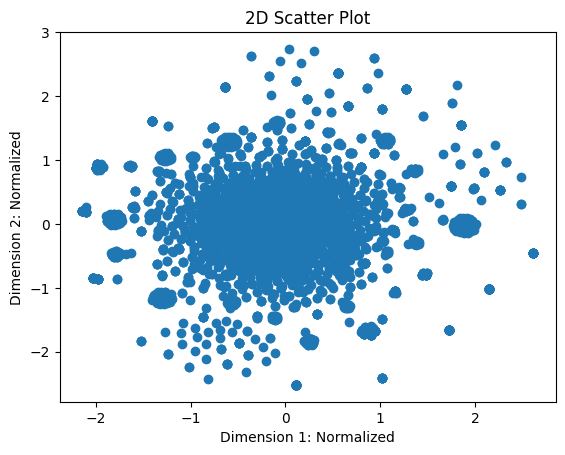

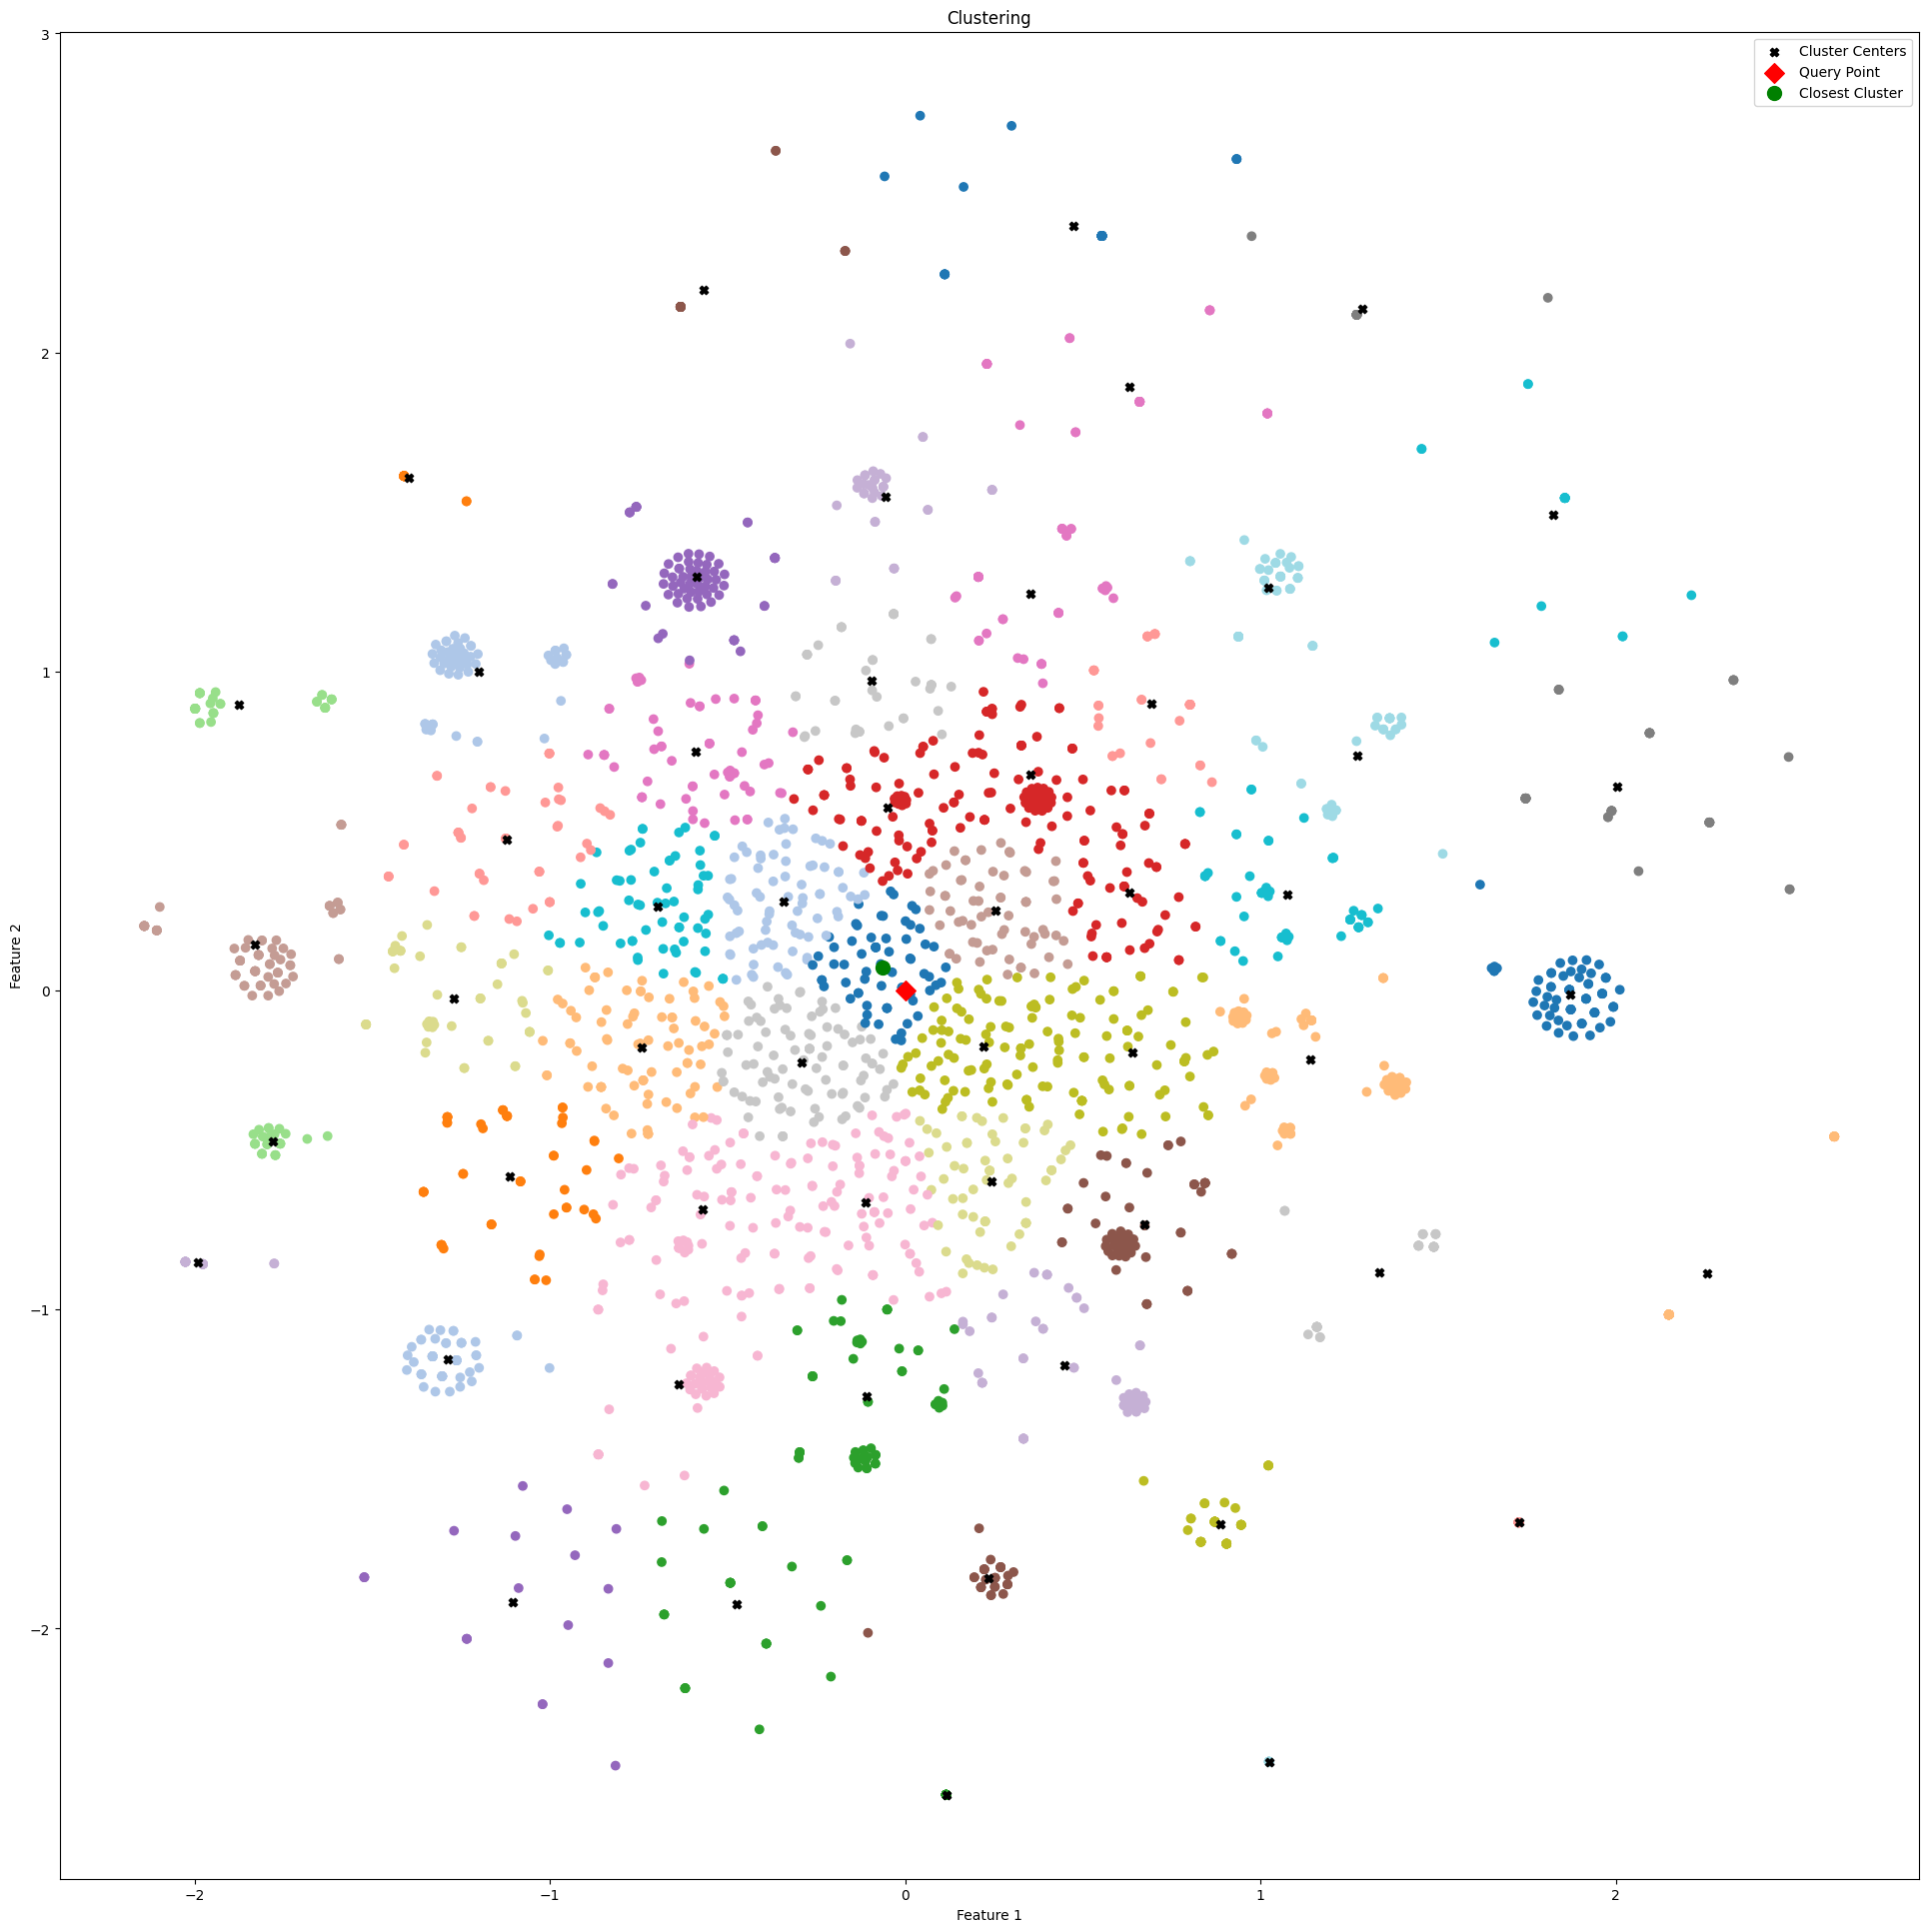

Cluster 1 - Mahalanobis Distance: 19.5967
Cluster 2 - Mahalanobis Distance: 22.9014
Cluster 3 - Mahalanobis Distance: 0.9143
Cluster 4 - Mahalanobis Distance: 14.9097
Cluster 5 - Mahalanobis Distance: 27.6710
Cluster 6 - Mahalanobis Distance: 4.2735
Cluster 7 - Mahalanobis Distance: 7.8534
Cluster 8 - Mahalanobis Distance: 892.6860
Cluster 9 - Mahalanobis Distance: 6.6948
Cluster 10 - Mahalanobis Distance: 2301.3032
Cluster 11 - Mahalanobis Distance: 5.8009
Cluster 12 - Mahalanobis Distance: 7.2361
Cluster 13 - Mahalanobis Distance: 2523.3895
Cluster 14 - Mahalanobis Distance: 10.3681
Cluster 15 - Mahalanobis Distance: 39.9790
Cluster 16 - Mahalanobis Distance: 41.0846
Cluster 17 - Mahalanobis Distance: 7.6556
Cluster 18 - Mahalanobis Distance: 5.0326
Cluster 19 - Mahalanobis Distance: 6.6396
Cluster 20 - Mahalanobis Distance: 2400.2584
Cluster 21 - Mahalanobis Distance: 8.2198
Cluster 22 - Mahalanobis Distance: 10.2261
Cluster 23 - Mahalanobis Distance: 11.7099
Cluster 24 - Mahalanobi

In [ ]:
if __name__ == "__main__":

    embeddings = embed_linguistic_data(Modern_informal)

    n_dimensions = 2
    perplexity = 30
    tsne_model = TSNE(n_components=n_dimensions, perplexity=perplexity)
    n_dimensional_points = tsne_model.fit_transform(embeddings)

    mean_values = np.mean(n_dimensional_points, axis=0)
    std_values = np.std(n_dimensional_points, axis=0)
    z_score_normalized_data = (n_dimensional_points - mean_values) / std_values

    print("Mean of z-score normalized data:", np.mean(z_score_normalized_data, axis=0))
    print("Standard deviation of z-score normalized data:", np.std(z_score_normalized_data, axis=0))

    plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')
    plt.xlabel('Dimension 1: Normalized')
    plt.ylabel('Dimension 2: Normalized')
    plt.title('2D Scatter Plot')
    plt.show()

    np.random.seed(42)
    X = z_score_normalized_data

    Modern_cluster_centers_indices, Modern_cluster_centers = affinity_propagation(X)

    if not Modern_cluster_centers.any():
        print("Clustering failed to converge.")
    else:
        Modern_clusters_data = [X[Modern_cluster_centers_indices == i] for i in range(len(Modern_cluster_centers))]
        covariances = [compute_covariance_matrix(cluster_data) for cluster_data in Modern_clusters_data]

        query_point = np.array([0.0, 0.0])

        distances = mahalanobis_distance(query_point, Modern_cluster_centers, covariances)

        min_distance = float('inf')
        min_cluster_index = -1
        for i, distance in enumerate(distances):
            if distance < min_distance:
                min_distance = distance
                min_cluster_index = i

        plot_clusters(X, Modern_cluster_centers_indices, Modern_cluster_centers, query_point, min_cluster_index)

        for i, distance in enumerate(distances):
            print(f"Cluster {i+1} - Mahalanobis Distance: {distance:.4f}")

        if min_cluster_index != -1:
            print(f"\nCluster with the smallest Mahalanobis distance: Cluster {min_cluster_index + 1}")

In [ ]:
calculate_jaccard_similarity(Illiad_cluster_centers_indices, Modern_cluster_centers_indices)

0.9818181818181818

# Clustering of Formal Text (Control)

In [ ]:
Illiad_formal1 = Illiad_formal[:500]

Mean of z-score normalized data: [-2.7780128e-08  6.5595430e-08]
Standard deviation of z-score normalized data: [1.000011   0.99999934]


<ipython-input-69-e034b25bb779>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')


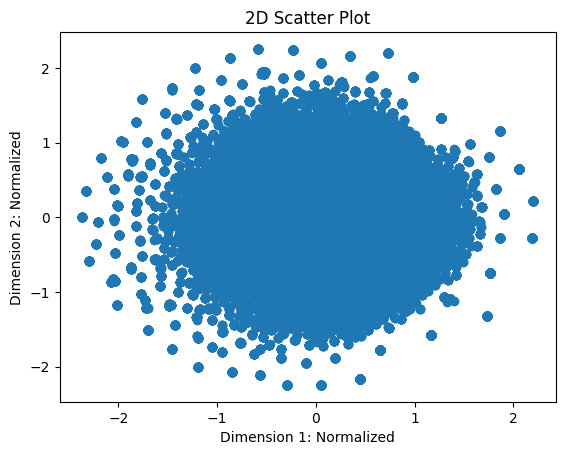

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


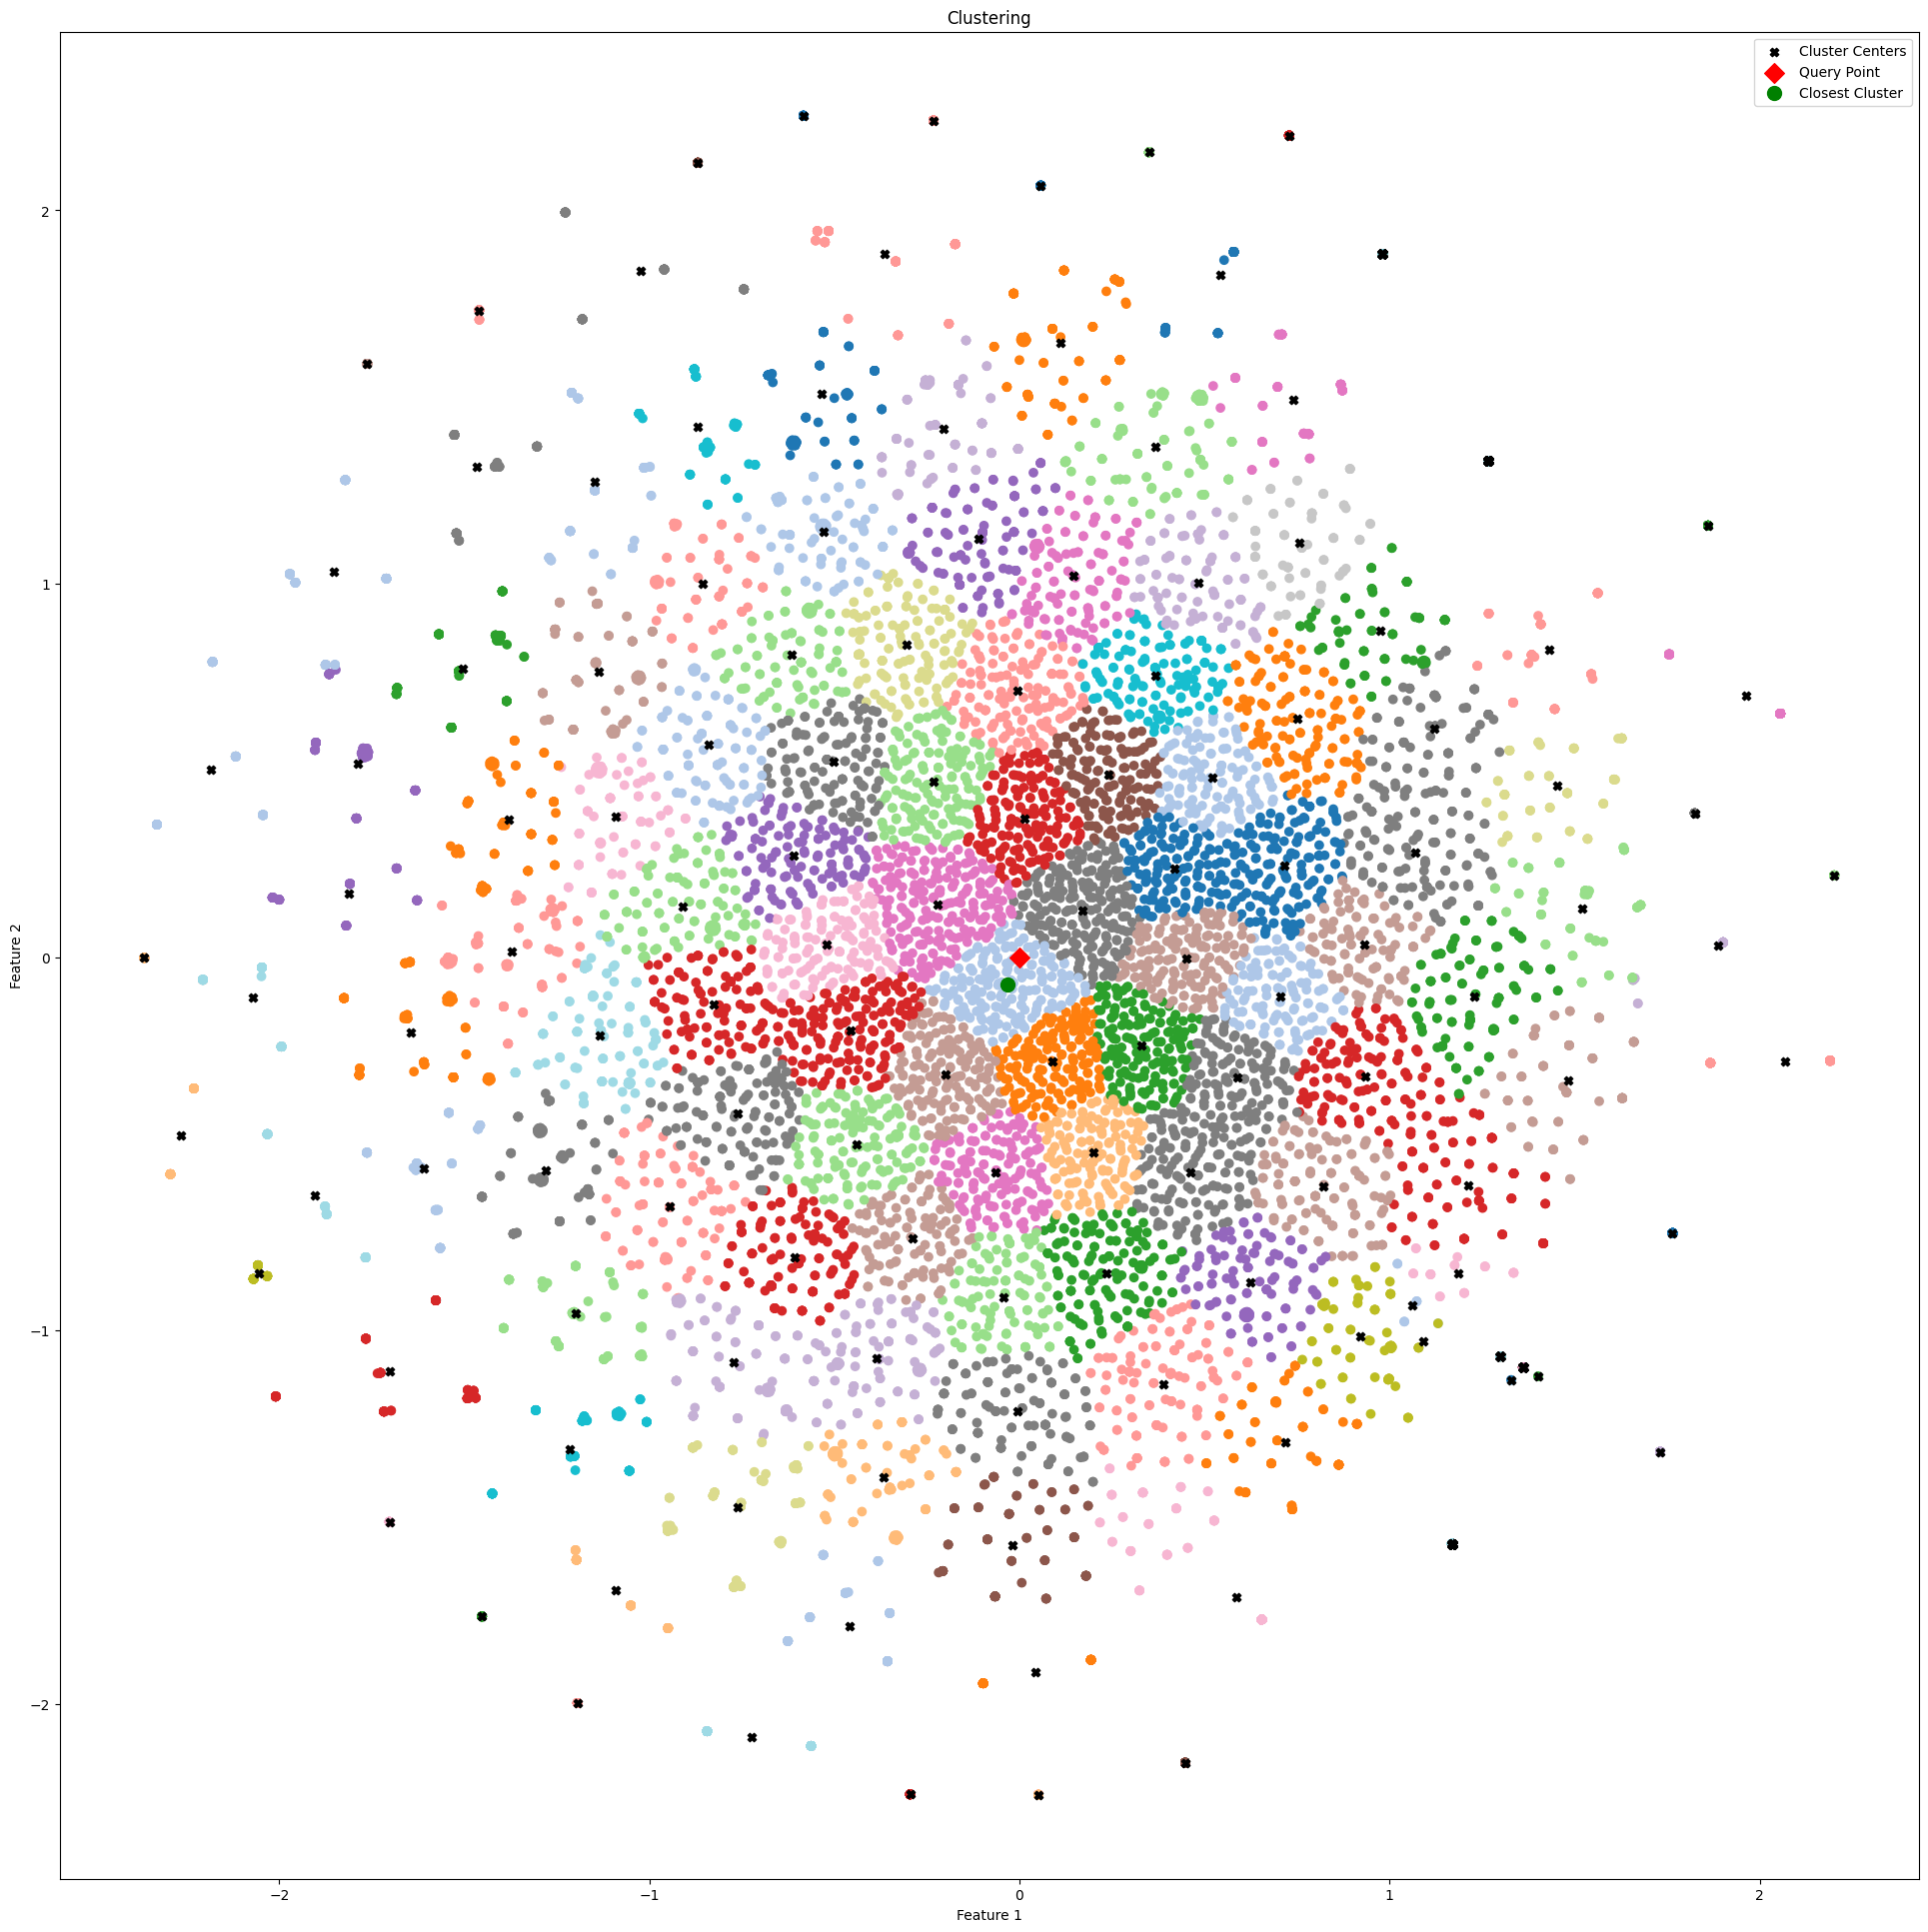

Cluster 1 - Mahalanobis Distance: 1.7450
Cluster 2 - Mahalanobis Distance: 23.2221
Cluster 3 - Mahalanobis Distance: 1.8357
Cluster 4 - Mahalanobis Distance: 1.9574
Cluster 5 - Mahalanobis Distance: 1912.8167
Cluster 6 - Mahalanobis Distance: 1.8357
Cluster 7 - Mahalanobis Distance: 14.8508
Cluster 8 - Mahalanobis Distance: 1.8357
Cluster 9 - Mahalanobis Distance: 1.8357
Cluster 10 - Mahalanobis Distance: 1.8357
Cluster 11 - Mahalanobis Distance: 1.8357
Cluster 12 - Mahalanobis Distance: 1.7482
Cluster 13 - Mahalanobis Distance: 1.8357
Cluster 14 - Mahalanobis Distance: 2327.6984
Cluster 15 - Mahalanobis Distance: 1.7482
Cluster 16 - Mahalanobis Distance: 1.8357
Cluster 17 - Mahalanobis Distance: 8.8286
Cluster 18 - Mahalanobis Distance: 1.9574
Cluster 19 - Mahalanobis Distance: 2.1238
Cluster 20 - Mahalanobis Distance: 1.8357
Cluster 21 - Mahalanobis Distance: 1.8357
Cluster 22 - Mahalanobis Distance: 1.9574
Cluster 23 - Mahalanobis Distance: 1.9574
Cluster 24 - Mahalanobis Distance: 

In [ ]:
if __name__ == "__main__":

    embeddings = embed_linguistic_data(Illiad_formal1)

    n_dimensions = 2
    perplexity = 30
    tsne_model = TSNE(n_components=n_dimensions, perplexity=perplexity)
    n_dimensional_points = tsne_model.fit_transform(embeddings)

    mean_values = np.mean(n_dimensional_points, axis=0)
    std_values = np.std(n_dimensional_points, axis=0)
    z_score_normalized_data = (n_dimensional_points - mean_values) / std_values

    print("Mean of z-score normalized data:", np.mean(z_score_normalized_data, axis=0))
    print("Standard deviation of z-score normalized data:", np.std(z_score_normalized_data, axis=0))

    plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')
    plt.xlabel('Dimension 1: Normalized')
    plt.ylabel('Dimension 2: Normalized')
    plt.title('2D Scatter Plot')
    plt.show()

    np.random.seed(42)
    X = z_score_normalized_data

    Illiad1_cluster_centers_indices, Illiad1_cluster_centers = affinity_propagation(X)

    if not Illiad1_cluster_centers.any():
        print("Clustering failed to converge.")
    else:
        Illiad1_clusters_data = [X[Illiad1_cluster_centers_indices == i] for i in range(len(Illiad1_cluster_centers))]
        covariances = [compute_covariance_matrix(cluster_data) for cluster_data in Illiad1_clusters_data]

        query_point = np.array([0.0, 0.0])

        distances = mahalanobis_distance(query_point, Illiad1_cluster_centers, covariances)

        min_distance = float('inf')
        min_cluster_index = -1
        for i, distance in enumerate(distances):
            if distance < min_distance:
                min_distance = distance
                min_cluster_index = i

        plot_clusters(X, Illiad1_cluster_centers_indices, Illiad1_cluster_centers, query_point, min_cluster_index)

        for i, distance in enumerate(distances):
            print(f"Cluster {i+1} - Mahalanobis Distance: {distance:.4f}")

        if min_cluster_index != -1:
            print(f"\nCluster with the smallest Mahalanobis distance: Cluster {min_cluster_index + 1}")

In [ ]:
Modern_formal1 = Modern_formal[:500]

Mean of z-score normalized data: [1.1875974e-07 3.6972638e-09]
Standard deviation of z-score normalized data: [1.00001   1.0000122]


<ipython-input-71-e347a16d96fa>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')


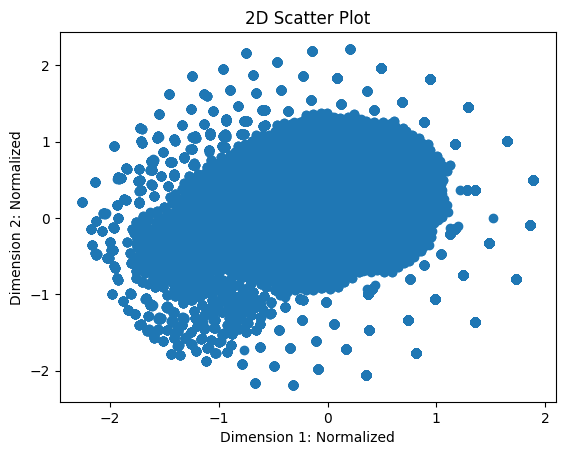

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


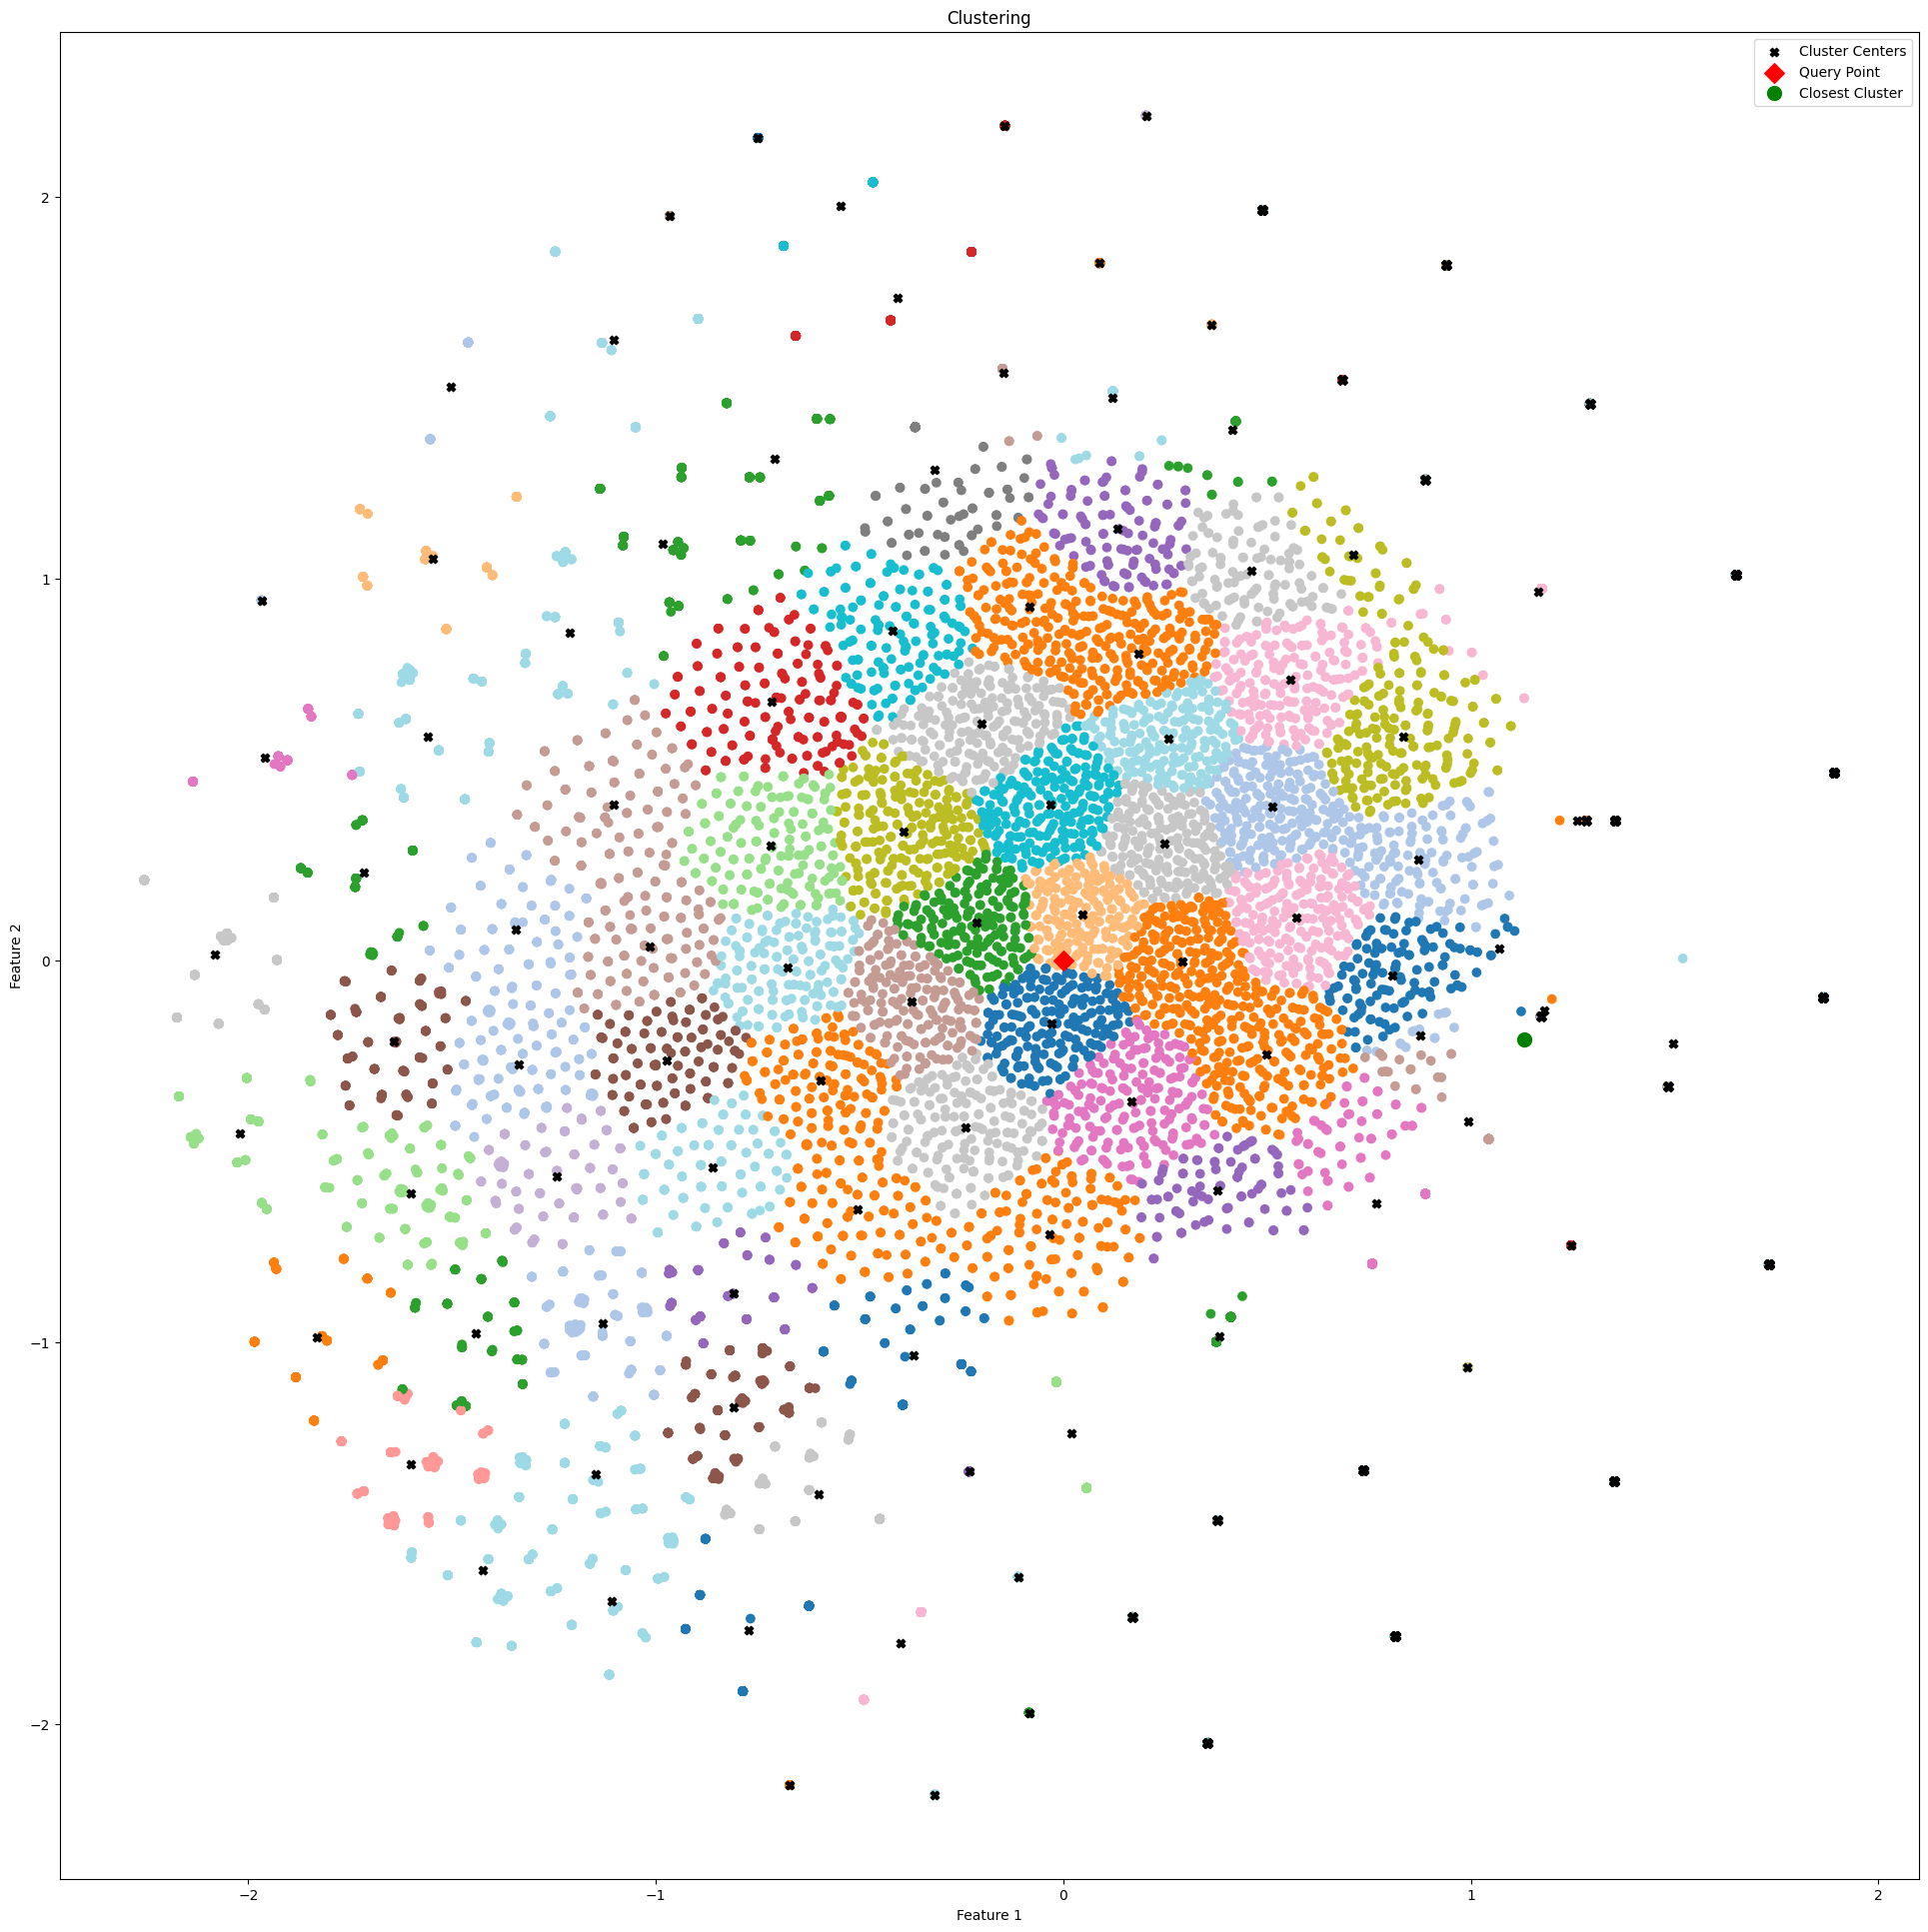

Cluster 1 - Mahalanobis Distance: 15.1445
Cluster 2 - Mahalanobis Distance: 28.9623
Cluster 3 - Mahalanobis Distance: 10.5391
Cluster 4 - Mahalanobis Distance: 1.8678
Cluster 5 - Mahalanobis Distance: 1514.7746
Cluster 6 - Mahalanobis Distance: 1.5261
Cluster 7 - Mahalanobis Distance: 1.9054
Cluster 8 - Mahalanobis Distance: 2.0803
Cluster 9 - Mahalanobis Distance: 1.9341
Cluster 10 - Mahalanobis Distance: 1.9054
Cluster 11 - Mahalanobis Distance: 2.0246
Cluster 12 - Mahalanobis Distance: 1519.3541
Cluster 13 - Mahalanobis Distance: 2.0246
Cluster 14 - Mahalanobis Distance: 2.0803
Cluster 15 - Mahalanobis Distance: 1.9341
Cluster 16 - Mahalanobis Distance: 1.8678
Cluster 17 - Mahalanobis Distance: 1.9480
Cluster 18 - Mahalanobis Distance: 1.9490
Cluster 19 - Mahalanobis Distance: 1.9212
Cluster 20 - Mahalanobis Distance: 1.8678
Cluster 21 - Mahalanobis Distance: 2.0246
Cluster 22 - Mahalanobis Distance: 1.3332
Cluster 23 - Mahalanobis Distance: 1519.3541
Cluster 24 - Mahalanobis Distan

In [ ]:
if __name__ == "__main__":

    embeddings = embed_linguistic_data(Modern_formal1)

    n_dimensions = 2
    perplexity = 30
    tsne_model = TSNE(n_components=n_dimensions, perplexity=perplexity)
    n_dimensional_points = tsne_model.fit_transform(embeddings)

    mean_values = np.mean(n_dimensional_points, axis=0)
    std_values = np.std(n_dimensional_points, axis=0)
    z_score_normalized_data = (n_dimensional_points - mean_values) / std_values

    print("Mean of z-score normalized data:", np.mean(z_score_normalized_data, axis=0))
    print("Standard deviation of z-score normalized data:", np.std(z_score_normalized_data, axis=0))

    plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')
    plt.xlabel('Dimension 1: Normalized')
    plt.ylabel('Dimension 2: Normalized')
    plt.title('2D Scatter Plot')
    plt.show()

    np.random.seed(42)
    X = z_score_normalized_data

    Modern1_cluster_centers_indices, Modern1_cluster_centers = affinity_propagation(X)

    if not Modern1_cluster_centers.any():
        print("Clustering failed to converge.")
    else:
        Modern1_clusters_data = [X[Modern1_cluster_centers_indices == i] for i in range(len(Modern1_cluster_centers))]
        covariances = [compute_covariance_matrix(cluster_data) for cluster_data in Modern1_clusters_data]

        query_point = np.array([0.0, 0.0])

        distances = mahalanobis_distance(query_point, Modern1_cluster_centers, covariances)

        min_distance = float('inf')
        min_cluster_index = -1
        for i, distance in enumerate(distances):
            if distance < min_distance:
                min_distance = distance
                min_cluster_index = i

        plot_clusters(X, Modern1_cluster_centers_indices, Modern1_cluster_centers, query_point, min_cluster_index)

        for i, distance in enumerate(distances):
            print(f"Cluster {i+1} - Mahalanobis Distance: {distance:.4f}")

        if min_cluster_index != -1:
            print(f"\nCluster with the smallest Mahalanobis distance: Cluster {min_cluster_index + 1}")

In [ ]:
calculate_jaccard_similarity(Illiad1_cluster_centers_indices, Modern1_cluster_centers_indices)

0.4077896138482024